In [16]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import re
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt



In [17]:
import pandas as pd 
df = pd.read_csv('./data_list/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df2 = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [19]:
df2

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot:>

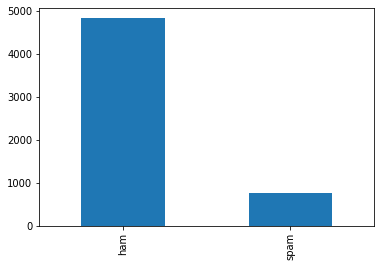

In [21]:
df2['v1'].value_counts().plot(kind='bar')

In [22]:
from sklearn.preprocessing import LabelEncoder

#라벨 인코딩 
encoder = LabelEncoder()
df2['v1'].unique()
encoder.fit(df2['v1'].unique())
target = encoder.transform(df2['v1'])

df2['v1'] = target
df2['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int32

In [23]:
df2

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(ngram_range= (1,2), min_df= 3, max_df = 0.9, lowercase = True, stop_words = 'english')
tfidf

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2), stop_words='english')

In [28]:
#test/train data 나누기 
train = df[:5572]
test = df[:5572]
X_train, X_test, y_train, y_test = train_test_split(df2['v2'], df2['v1'], test_size = 0.2, random_state = 42 )


In [29]:
X_train.head()
y_train.head()

1978    0
3989    1
3935    0
4078    0
4086    1
Name: v1, dtype: int32

In [30]:
X_test.head()

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
Name: v2, dtype: object

In [31]:
tfidf.fit(X_train)

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2), stop_words='english')

In [32]:
train_tfidf_df = tfidf.transform(X_train)
train_tfidf_df 

<4457x3625 sparse matrix of type '<class 'numpy.float64'>'
	with 35084 stored elements in Compressed Sparse Row format>

In [33]:
test_tfidf_df = tfidf.transform(X_test)
test_tfidf_df

<1115x3625 sparse matrix of type '<class 'numpy.float64'>'
	with 7827 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.linear_model import LogisticRegression 

SA_lr = LogisticRegression(random_state = 0)

In [37]:
SA_lr.fit(train_tfidf_df, y_train)

LogisticRegression(random_state=0)

In [38]:
test_predict = SA_lr.predict(test_tfidf_df)

In [39]:
from sklearn.metrics import accuracy_score 

print('감정 분석 정확도:', round(accuracy_score(y_test, test_predict), 3))

감정 분석 정확도: 0.966


In [40]:
import pickle 
import joblib 

In [41]:
saved_model = pickle.dumps(SA_lr)

In [42]:
lr_from_pickle = pickle.loads(saved_model)

In [43]:
lr_from_pickle.predict(tfidf.transform(['WINNER! I HAVE A DATE ON SUNDAY WITH WILL!! Free~~']))

array([0])

In [44]:
joblib.dump(SA_lr, 'spam_ham_lr.pkl')

['spam_ham_lr.pkl']

In [45]:
lr_from_joblib = joblib.load('spam_ham_lr.pkl')
lr_from_joblib

LogisticRegression(random_state=0)